In [1]:
from trackeddy.trackeddy import *
import matplotlib.pyplot as plt
import cmocean as cm
import numpy as np

In [2]:
filepath = './data/dt_global_allsat_phy_l4_20200429_20201126.nc'

In [3]:
TEddy = TrackEddy(dataset=filepath,variable='sla')

In [23]:
lin_levels_neg = np.arange(-0.5,-0.1,0.01)
lin_level_near0 =  np.arange(-0.1,0.1,0.001)
lin_levels_pos = np.arange(0.1,0.5,0.01)

In [33]:
lin_levels = np.hstack([lin_levels_neg,lin_level_near0,lin_levels_pos])

In [35]:
df_eddy_multilevel_store = TEddy._detect_snapshot(0,lin_levels)

In [36]:
df_eddy_multilevel_store

contour_path_x  contour_path_y  level    area_eddy  \
identifier index                                                       
0          0          179.375000      -63.382193  -0.06  4608.287187   
           1          179.363926      -63.375000  -0.06  4608.287187   
           2          179.265706      -63.125000  -0.06  4608.287187   
           3          179.375000      -62.983436  -0.06  4608.287187   
           4          179.500350      -62.875000  -0.06  4608.287187   
...                          ...             ...    ...          ...   
5119       6          305.125000      -55.627660   0.40  2145.885864   
           7          304.875000      -55.661563   0.40  2145.885864   
           8          304.625000      -55.817978   0.40  2145.885864   
           9          304.573158      -55.875000   0.40  2145.885864   
           10         304.625000      -55.934131   0.40  2145.885864   

                  radius_eddy  ellipse_params_a  ellipse_params_b  \
identifier index                                                    
0          0        38.299652          0.680891          0.402311   
           1        38.299652          0.680891          0.402311   
           2        38.299652          0.680891          0.402311   
           3        38.299652          0.680891          0.402311   
           4        38.299652          0.680891          0.402311   
...                       ...               ...               ...   
5119       6        26.135353          0.454233          0.241056   
           7        26.135353          0.454233          0.241056   
           8        26.135353          0.454233          0.241056   
           9        26.135353          0.454233          0.241056   
           10       26.135353          0.454233          0.241056   

                  ellipse_params_theta  contour_ellipse_error  ellipse_eccen  \
identifier index                                                               
0          0                  0.021592                 0.4730       0.806774   
           1                  0.021592                 0.4730       0.806774   
           2                  0.021592                 0.4730       0.806774   
           3                  0.021592                 0.4730       0.806774   
           4                  0.021592                 0.4730       0.806774   
...                                ...                    ...            ...   
5119       6                 -0.057412                 0.4335       0.847567   
           7                 -0.057412                 0.4335       0.847567   
           8                 -0.057412                 0.4335       0.847567   
           9                 -0.057412                 0.4335       0.847567   
           10                -0.057412                 0.4335       0.847567   

                  ...  eddy_sign    maxima  maxima_y  maxima_x  \
identifier index  ...                                            
0          0      ...       -1.0 -0.169241   -63.125   179.875   
           1      ...       -1.0 -0.169241   -63.125   179.875   
           2      ...       -1.0 -0.169241   -63.125   179.875   
           3      ...       -1.0 -0.169241   -63.125   179.875   
           4      ...       -1.0 -0.169241   -63.125   179.875   
...               ...        ...       ...       ...       ...   
5119       6      ...        1.0  0.469623   -55.875   305.125   
           7      ...        1.0  0.469623   -55.875   305.125   
           8      ...        1.0  0.469623   -55.875   305.125   
           9      ...        1.0  0.469623   -55.875   305.125   
           10     ...        1.0  0.469623   -55.875   305.125   

                  gaussian_params_x  gaussian_params_y  \
identifier index                                         
0          0                179.875            -63.125   
           1                179.875            -63.125   
           2                179.875            -63.

In [37]:
df_eddy_multilevel_store.to_csv("./data/identified_eddies.csv")

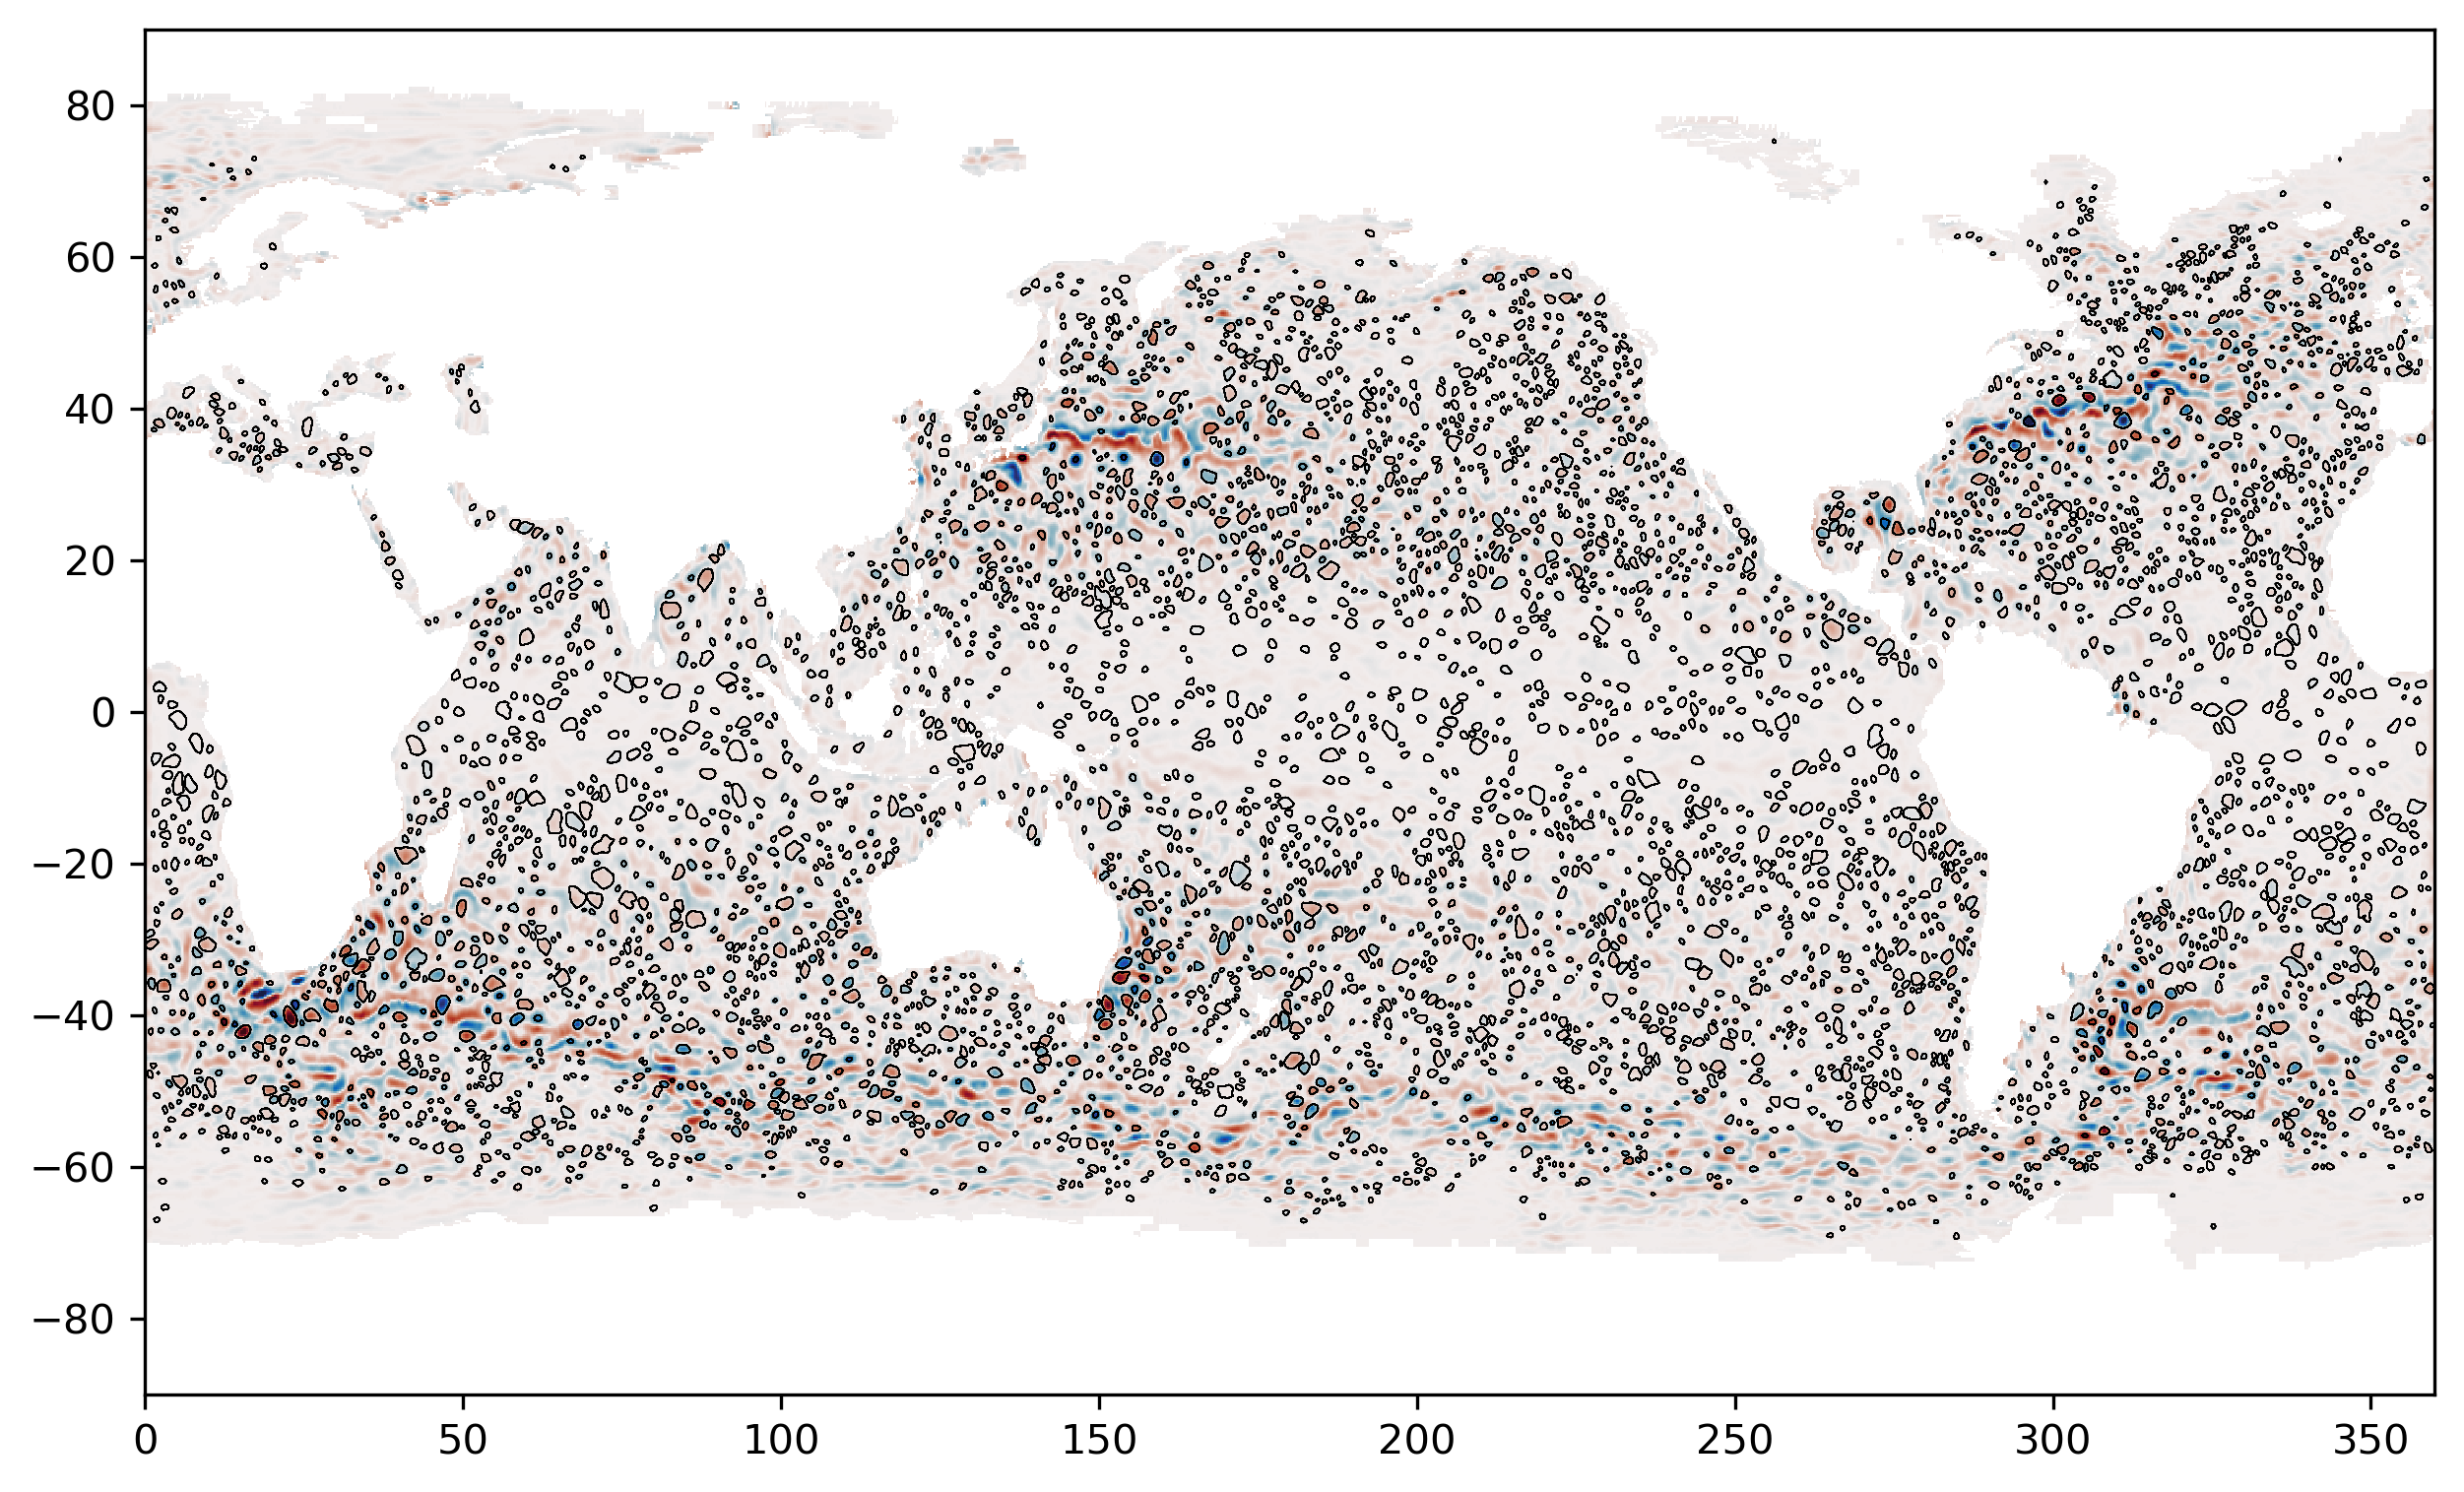

In [38]:
levels = df_eddy_multilevel_store.level.unique()

plt.figure(figsize=(10, 6), dpi=300)
plt.pcolormesh(
    TEddy.X, TEddy.Y, TEddy.data2track, cmap=cm.cm.balance, vmin=-0.5, vmax=0.5
)

for eddy in df_eddy_multilevel_store.index.get_level_values(level=0):
    c_path_x = df_eddy_multilevel_store.loc[eddy].contour_path_x
    c_path_y = df_eddy_multilevel_store.loc[eddy].contour_path_y

    inx = np.where(df_eddy_multilevel_store.loc[eddy].level[0] == levels)[0][0]

    plt.plot(c_path_x, c_path_y, color='k', linewidth=0.3)

In [50]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.colors as colors

In [42]:
import xarray as xr

In [43]:
ssh = xr.open_dataset(filepath)

In [47]:
KE = 1/2 * (ssh.ugosa**2 + ssh.vgosa**2).squeeze()

In [60]:
adt = ssh.adt.squeeze()

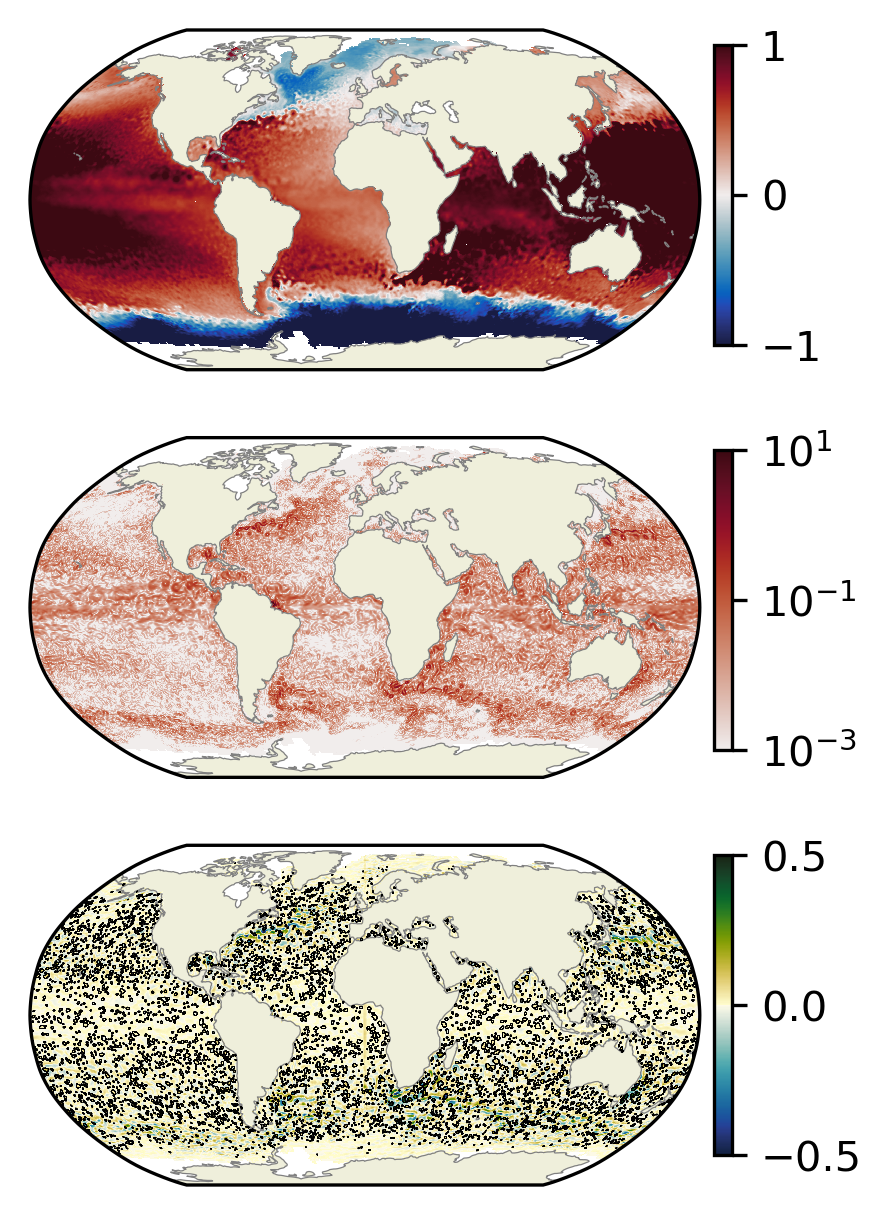

In [84]:
fig = plt.figure(figsize=(3, 5),dpi=300)

ax1 = fig.add_subplot(3, 1, 1, projection=ccrs.Robinson())
adt_c = ax1.pcolormesh(
    adt.longitude, adt.latitude, adt, cmap=cm.cm.balance, vmin=-1, vmax=1, transform=ccrs.PlateCarree(), rasterized=True
)


ax2 = fig.add_subplot(3, 1, 2, projection=ccrs.Robinson())
ke_c = ax2.pcolormesh(
    KE.longitude, KE.latitude, KE, cmap=cm.cm.amp, norm=colors.LogNorm(vmin=1e-3, vmax=1e1), transform=ccrs.PlateCarree(), rasterized=True
)


ax3 = fig.add_subplot(3, 1, 3, projection=ccrs.Robinson())
sla_c = ax3.pcolormesh(
    TEddy.X, TEddy.Y, TEddy.data2track, cmap=cm.cm.delta, vmin=-0.5, vmax=0.5, transform=ccrs.PlateCarree(), rasterized=True
)


for eddy in df_eddy_multilevel_store.index.get_level_values(level=0):
    c_path_x = df_eddy_multilevel_store.loc[eddy].contour_path_x
    c_path_y = df_eddy_multilevel_store.loc[eddy].contour_path_y

    inx = np.where(df_eddy_multilevel_store.loc[eddy].level[0] == levels)[0][0]

    ax3.plot(c_path_x, c_path_y, color='k', linewidth=0.1, transform=ccrs.PlateCarree())

### Colorbars ####
    
cax = fig.add_axes([0.9, 0.67, 0.02, 0.2])
fig.colorbar(adt_c, cax=cax, orientation='vertical')

cax = fig.add_axes([0.9, 0.4, 0.02, 0.2])
fig.colorbar(ke_c, cax=cax, orientation='vertical')

cax = fig.add_axes([0.9, 0.13, 0.02, 0.2])
fig.colorbar(sla_c, cax=cax, orientation='vertical')

    
[ ax.set_global() for ax in [ax1,ax2,ax3] ]
[ ax.coastlines(color='gray',linewidth=0.3)  for ax in [ax1,ax2,ax3] ]
[ ax.add_feature(cfeature.LAND)  for ax in [ax1,ax2,ax3] ]
